In [1]:
import pandas as pd
import numpy as np
import chardet

import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_12088\2367652982.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def detect_file_encoding(file_path):
    """
    Detects the encoding of a file.

    Parameters:
    - file_path: str, the path to the file whose encoding needs to be detected.

    Returns:
    - str, the detected encoding of the file.
    """
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    detected_encoding = result['encoding']
    return detected_encoding

In [3]:
file_path = 'data/data_mendeley/600 news with valid hoax label.csv'

detected_encoding = detect_file_encoding(file_path)

In [4]:
df = pd.read_csv(file_path, encoding=detected_encoding, sep=';', on_bad_lines='skip')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   600 non-null    object
 1   tagging  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [6]:
df.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


In [7]:
df['tagging'].value_counts()

tagging
Valid    372
Hoax     228
Name: count, dtype: int64

In [8]:
def text_cleansing(df):
    df_clean = [text.replace('\n', '') for text in df]
    df_clean = [text.lower() for text in df_clean]
    df_clean = [re.sub(r"\d+", "", text) for text in df_clean]
    df_clean = [re.sub(r'[^\w]', ' ', text) for text in df_clean]
    df_clean = [re.sub(r'\s+', ' ', text) for text in df_clean]
    return df_clean

In [9]:
df['clean text'] = text_cleansing(df['berita'])
df.head()

,berita,tagging,clean text
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,jakarta di jejaring sosial banyak beredar info...
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,isu bahwa ikan lele mengandung sel kanker di j...
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,bagi penikmat kuliner dengan bahan dasar ikan ...
3,Ikan lele merupakan salah satu makanan favorit...,Valid,ikan lele merupakan salah satu makanan favorit...
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,ikan lele merupakan bahan makanan yang cukup p...


In [10]:
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df['clean text'] = df['clean text'].apply(word_tokenize_wrapper)
df.head()

,berita,tagging,clean text
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[jakarta, di, jejaring, sosial, banyak, bereda..."
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[isu, bahwa, ikan, lele, mengandung, sel, kank..."
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[bagi, penikmat, kuliner, dengan, bahan, dasar..."
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[ikan, lele, merupakan, salah, satu, makanan, ..."
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[ikan, lele, merupakan, bahan, makanan, yang, ..."


In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# import pandas as pd

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Create a StopWordRemover
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Apply the stopword remover to each row in the 'berita' column and create a new column with the results
df['removed_sw_berita'] = df['berita'].apply(lambda kalimat: stopword.remove(kalimat))

df['removed_sw_berita'] = text_cleansing(df['removed_sw_berita'])
df['removed_sw_berita'] = df['removed_sw_berita'].apply(word_tokenize_wrapper)
df.head()

,berita,tagging,clean text,removed_sw_berita
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[jakarta, di, jejaring, sosial, banyak, bereda...","[jakarta, di, jejaring, sosial, banyak, bereda..."
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, ikan, lele, mengandung, sel, kanker, jej..."
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, bahan, dasar, ikan, ..."
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ..."
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, cukup,..."


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [13]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    do = []
    for w in tokens:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    return d_clean
df['removed_sw_berita'] = df['removed_sw_berita'].apply(stemming)

In [14]:
categories = np.sort(df['tagging'].unique())
categories

df_categories = [df[df['tagging'] == category].loc[:, ['removed_sw_berita', 'tagging']] for category in categories]

In [15]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['removed_sw_berita'])
    wordcloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return wordcloud

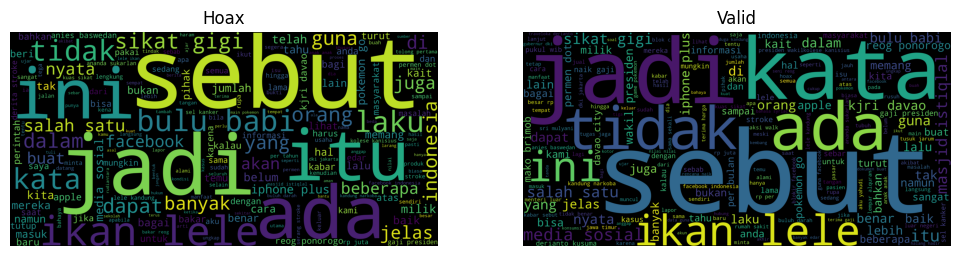

In [16]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()